In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

### First Glance

In [109]:
#df = pd.read_excel('2020-08-30.xlsx')
df2 = pd.read_excel('Coronavirus Colombia y Bogota.xlsx')

In [110]:
df2.head(5)

,Fecha,dias,Fallecidos,dias.1,Fallecidos (factor),dias.2,Fallecidos (resta),dias.3,Recuperados,dias.4,...,dias.8,Casos totales (log10),dias.9,Casos nuevos (resta).1,dias.10,Infectados activos,Infectados factor,dias.11,Casos activos,Unnamed: 27
0,2020-03-06,1.0,0.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,...,1.0,0.000000,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
1,2020-03-07,2.0,0.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,...,2.0,0.000000,2.0,0.0,2.0,1.0,1.0,NaN,NaN,NaN
2,2020-03-08,3.0,0.0,3.0,NaN,3.0,NaN,3.0,NaN,3.0,...,3.0,0.000000,3.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN
3,2020-03-09,4.0,0.0,4.0,NaN,4.0,NaN,4.0,NaN,4.0,...,4.0,0.477121,4.0,2.0,4.0,3.0,3.0,NaN,NaN,NaN
4,2020-03-10,5.0,0.0,5.0,NaN,5.0,NaN,5.0,NaN,5.0,...,5.0,0.477121,5.0,0.0,5.0,3.0,1.0,NaN,NaN,NaN


In [111]:
df2=df2[['Fecha','dias','Casos totales']]
df2.info

<bound method DataFrame.info of              Fecha  dias  Casos totales
0       2020-03-06   1.0            1.0
1       2020-03-07   2.0            1.0
2       2020-03-08   3.0            1.0
3       2020-03-09   4.0            3.0
4       2020-03-10   5.0            3.0
...            ...   ...            ...
1048570        NaT   NaN            NaN
1048571        NaT   NaN            NaN
1048572        NaT   NaN            NaN
1048573        NaT   NaN            NaN
1048574        NaT   NaN            NaN

[1048575 rows x 3 columns]>

In [112]:
df2=df2.dropna(axis=0,how='any',inplace=False).rename(columns={'Casos totales':'Casos'})
df2.head(5)

,Fecha,dias,Casos
0,2020-03-06,1.0,1.0
1,2020-03-07,2.0,1.0
2,2020-03-08,3.0,1.0
3,2020-03-09,4.0,3.0
4,2020-03-10,5.0,3.0


### Exploring Data: Visualisation

<IPython.core.display.Javascript object>


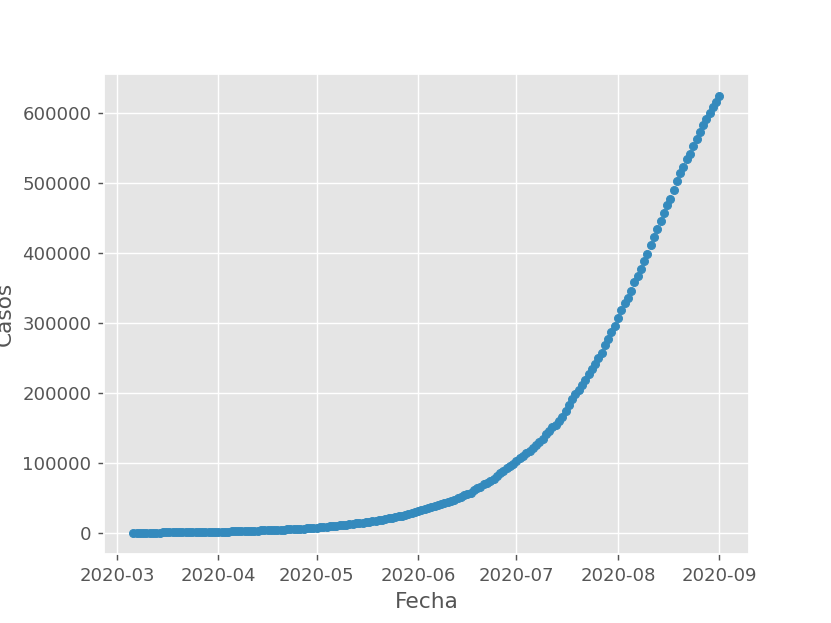

In [113]:
plt.style.use('ggplot')
df2.plot('Fecha','Casos', kind = 'scatter');

<IPython.core.display.Javascript object>


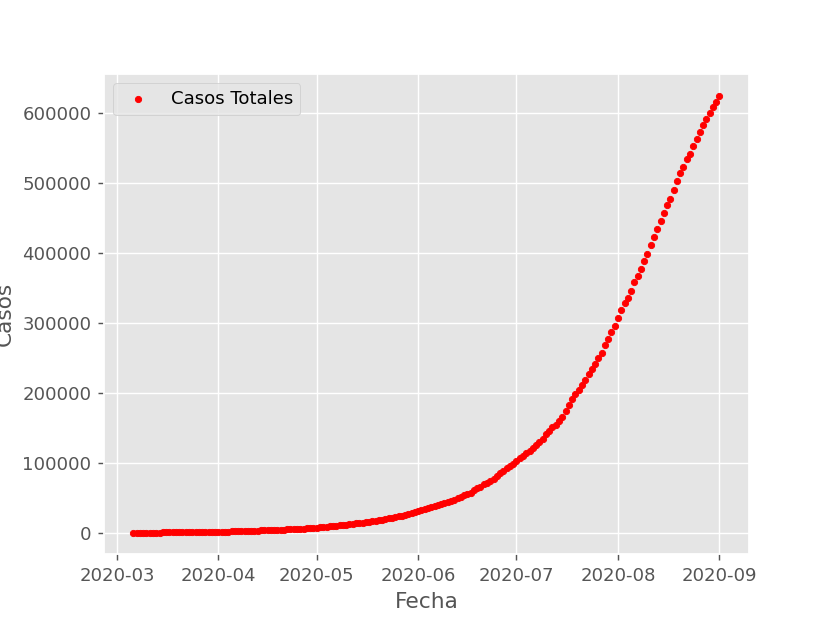

In [114]:
#Using Dataset2
# Nice Plotting Figure
plt.style.use('ggplot')

Fecha = df2['Fecha']
Casos = df2['Casos']

plt.figure()
ax=plt.gca()
ax.scatter(Fecha,Casos,s=12,c='r',label='Casos Totales')
plt.xlabel('Fecha')
plt.ylabel('Casos')
ax.legend()

### Determinar Inicio de Pandemia

In [115]:
Fecha

0     2020-03-06
1     2020-03-07
2     2020-03-08
3     2020-03-09
4     2020-03-10
         ...    
175   2020-08-28
176   2020-08-29
177   2020-08-30
178   2020-08-31
179   2020-09-01
Name: Fecha, Length: 180, dtype: datetime64[ns]

In [116]:
# Select 1 months : '2020-08-01'
import numpy as np
i, c = np.where(df2 == '2020-08-01')
print(i)
print(c)

[148]
[0]


C:\Users\PC\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [117]:
Fecha = df2['Fecha'][:i[0]]
Casos= df2['Casos'][:i[0]]

<IPython.core.display.Javascript object>


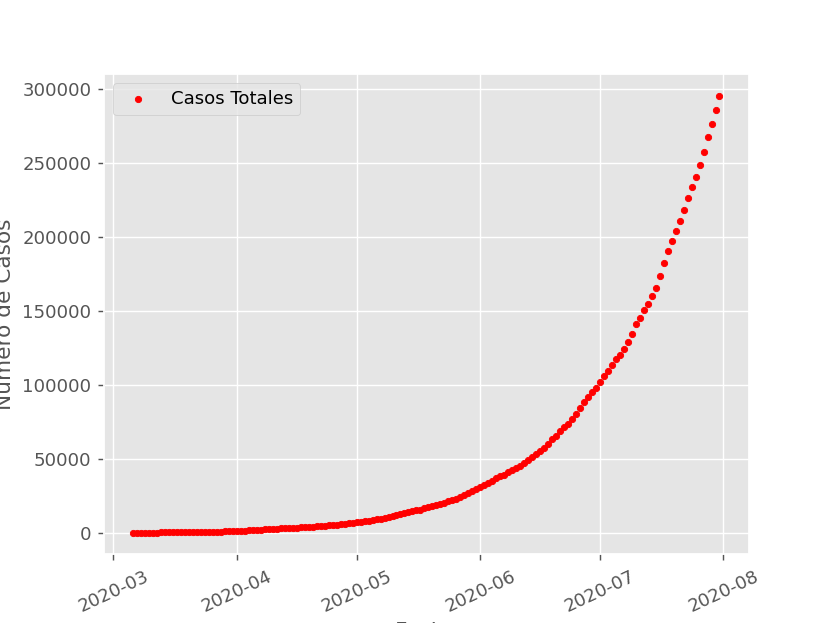

In [118]:
plt.figure()
ax=plt.gca()
ax.scatter(Fecha,Casos,s=12,c='r',label='Casos Totales')
plt.xlabel('Fecha')
plt.ylabel('Numero de Casos')
ax.legend()

# rotate x axes
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(25)

### Ajustar curva

In [119]:
Fecha[:i[0]]

0     2020-03-06
1     2020-03-07
2     2020-03-08
3     2020-03-09
4     2020-03-10
         ...    
143   2020-07-27
144   2020-07-28
145   2020-07-29
146   2020-07-30
147   2020-07-31
Name: Fecha, Length: 148, dtype: datetime64[ns]

$$ y(x) = ae^{bx}+c$$

In [120]:
import numpy as np
from scipy.optimize import curve_fit

fecha = np.linspace(0,len(Fecha),i[0])

def exp_function(x,a,b,c):
    return a*np.exp(b*x)+c

# p0 : initial guess of parameters 
para, _ = curve_fit(f=exp_function, xdata=fecha, ydata=Casos,p0=[0,0,0])

In [121]:
para

array([ 1.53583416e+03,  3.57201145e-02, -3.55810988e+03])

<IPython.core.display.Javascript object>


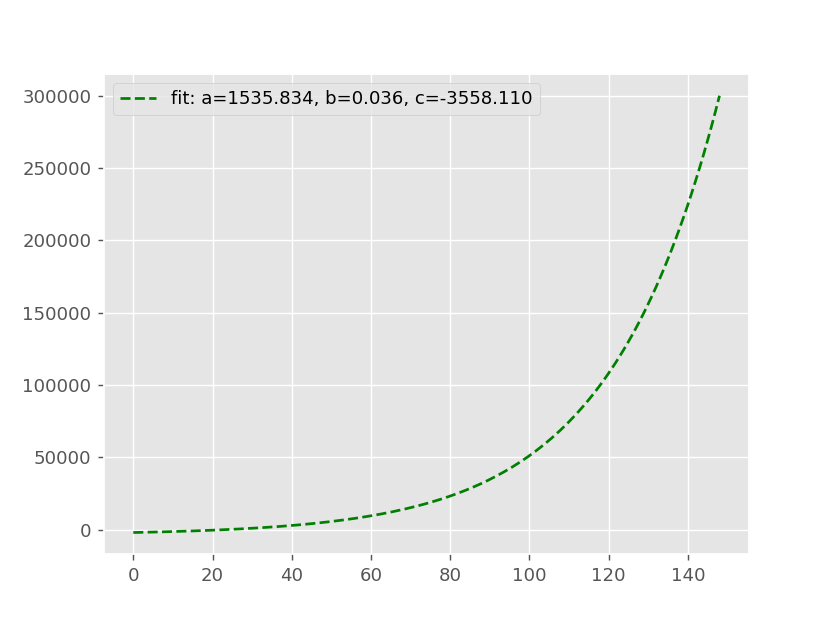

In [122]:
plt.figure()
plt.plot(fecha, exp_function(fecha, *para), 'g--',label='fit: a={:.3f}, b={:.3f}, c={:.3f}'.format(para[0],para[1],para[2]))
plt.legend()

In [125]:
# Segundo Fit
para2, _ = curve_fit(f=exp_function,
                     xdata=fecha,
                     ydata=Casos,
                     p0=[0,0,0],
                     bounds=(-1, [np.inf,1,np.inf]))
para2

array([ 1.21777462e+03,  3.72713991e-02, -1.00000000e+00])

<IPython.core.display.Javascript object>


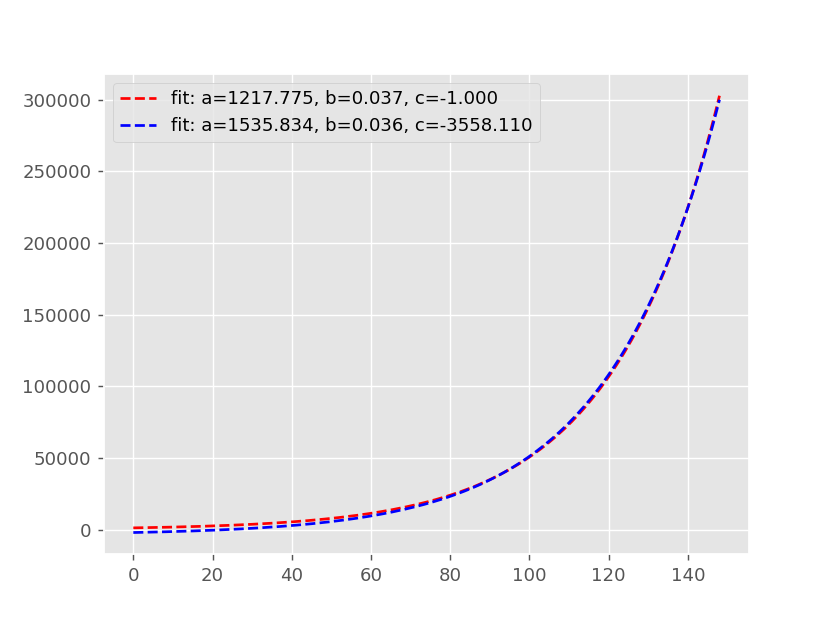

In [126]:
plt.figure()
plt.plot(fecha, exp_function(fecha, *para2), 'r--',label='fit: a={:.3f}, b={:.3f}, c={:.3f}'.format(para2[0],para2[1],para2[2]))
plt.plot(fecha, exp_function(fecha, *para), 'b--',label='fit: a={:.3f}, b={:.3f}, c={:.3f}'.format(para[0],para[1],para[2]))
plt.legend()

<IPython.core.display.Javascript object>


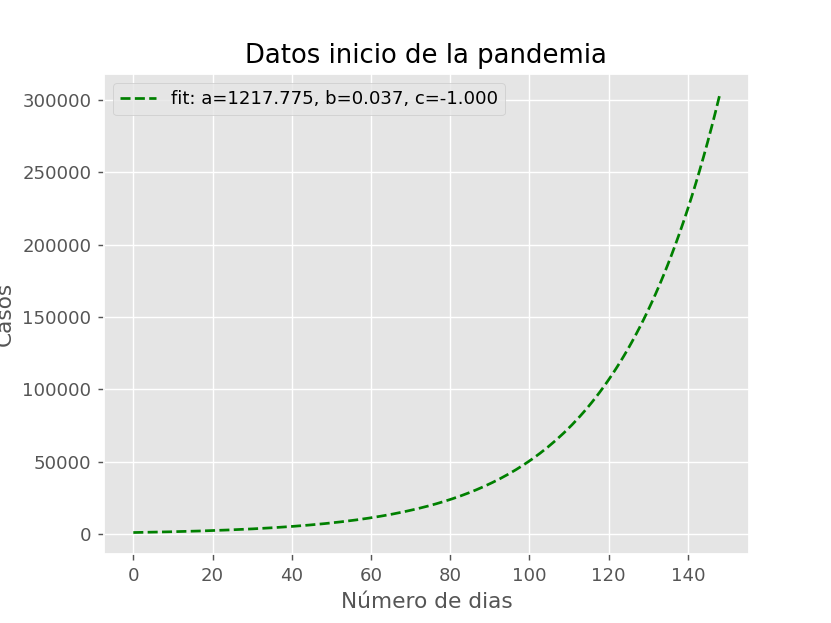

In [127]:
# Select para2
plt.figure()
plt.plot(fecha, exp_function(fecha, *para2), 'g--',label='fit: a={:.3f}, b={:.3f}, c={:.3f}'.format(para2[0],para2[1],para2[2]))
plt.xlabel('Número de dias')
plt.ylabel('Casos')
plt.title(r'Datos inicio de la pandemia')
plt.legend()

In [128]:
Fecha

0     2020-03-06
1     2020-03-07
2     2020-03-08
3     2020-03-09
4     2020-03-10
         ...    
143   2020-07-27
144   2020-07-28
145   2020-07-29
146   2020-07-30
147   2020-07-31
Name: Fecha, Length: 148, dtype: datetime64[ns]

In [129]:
para2

array([ 1.21777462e+03,  3.72713991e-02, -1.00000000e+00])

<IPython.core.display.Javascript object>


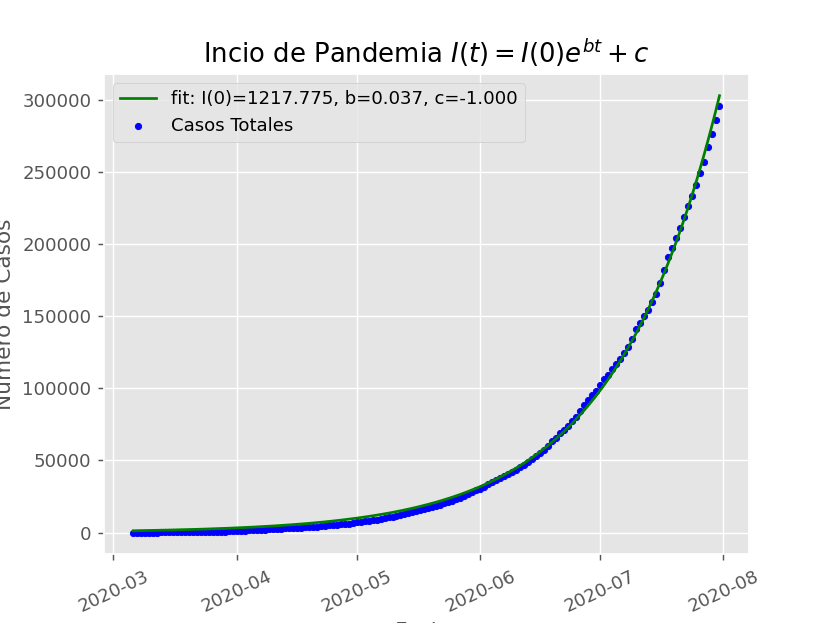

In [130]:
# Complete Curve
fecha = np.linspace(0,len(Fecha),i[0])
plt.figure()
ax=plt.gca()
ax.scatter(Fecha,Casos[:i[0]],s=12,c='blue',label='Casos Totales')

plt.plot(Fecha, 
         exp_function(fecha, *para2), 
         c='g',label='fit: I(0)={:.3f}, b={:.3f}, c={:.3f}'.format(para2[0],para2[1],para2[2]))

#plt.xticks(Fecha)
plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title(r'Incio de Pandemia $I(t)=I(0)e^{bt}+c$')
ax.legend()

# rotate x axes
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(25)

### Calculo de Parametros
_____


**Rata de Crecimiento Diario**:

$$ Rata = \frac{I(t+1)}{I(t)} \approx \exp{(a-b)} $$

In [131]:
print(r'I0={} b={} c={}'.format(para2[0],para2[1],para[2]))

I0=1217.7746228807428 b=0.037271399070727275 c=-3558.109877735851


In [272]:
R

[0.9802401765994744,
 0.9790763559601757,
 0.9778176515432813,
 0.976452955025215,
 0.9749693658718823,
 0.9733518143661444,
 0.9715825852890105,
 0.969640710306612,
 0.967501184808106,
 0.9651339470295129,
 0.962502530799456,
 0.9595622633208567,
 0.9562578180524806,
 0.9525198363857427,
 0.9482601767121688,
 0.9433650929858327,
 0.9376852075894079,
 0.9310203715645577,
 0.9230960884540689,
 0.9135254557030795,
 0.9017450607703811,
 0.8869013601225189,
 0.8676363226891629,
 0.8416500749636849,
 0.8047131237547507,
 0.748105469572227,
 0.6505036291551746,
 0.4423268830199099,
 -0.3086488789473846,
 5.400937454992148,
 1.8457905168746356,
 1.4756277268863476,
 1.3345623915940128,
 1.2602106100186807,
 1.2143229271329836,
 1.1831981991339564,
 1.160712798349225,
 1.1437184262620255,
 1.1304307819398025,
 1.1197630605517008,
 1.1110154726361892,
 1.1037170529201465,
 1.0975391975309015,
 1.0922456513177206,
 1.0876621948812666,
 1.083657536142888,
 1.0801308550708466,
 1.0770034472205539,

<IPython.core.display.Javascript object>


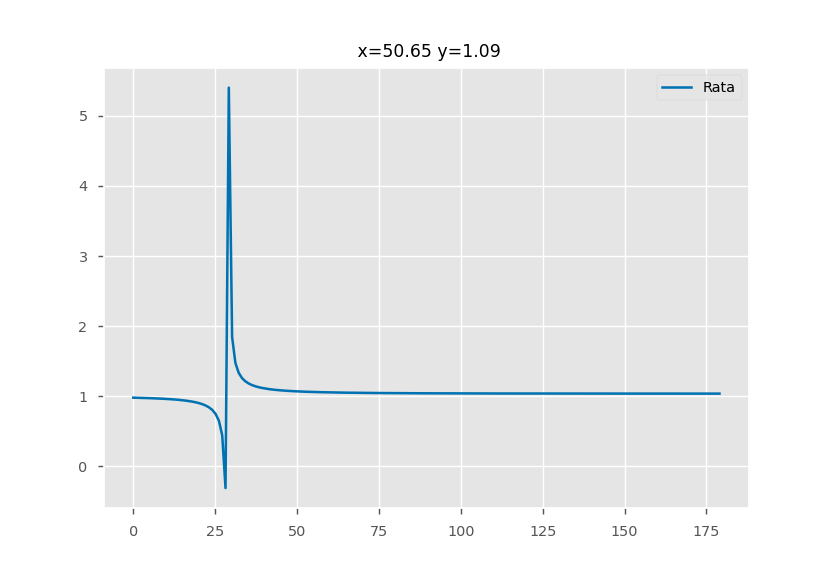

7

In [282]:
I0,b,c= para2[0],para2[1],para[2]
def exp_rate(t):
    return I0*np.exp(b*t)+c

R=[]
for i in range(0,179):
    R.append(exp_rate(i+1)/exp_rate(i))
d=np.linspace(0,179,179)

plt.figure()
plt.plot(d,R)

def onclick(event):
    plt.cla()
    plt.plot(d,R,label='Rata')
    plt.gca().set_title(' x={:.2f} y={:.2f}'.format( event.xdata, event.ydata))
    plt.legend()
    
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

[5.400937454992148]

### New Rata
____

In [217]:
df2 = pd.read_excel('Coronavirus Colombia y Bogota.xlsx')
df2

,Fecha,dias,Fallecidos,dias.1,Fallecidos (factor),dias.2,Fallecidos (resta),dias.3,Recuperados,dias.4,...,dias.8,Casos totales (log10),dias.9,Casos nuevos (resta).1,dias.10,Infectados activos,Infectados factor,dias.11,Casos activos,Unnamed: 27
0,2020-03-06,1.0,0.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,...,1.0,0.000000,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
1,2020-03-07,2.0,0.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,...,2.0,0.000000,2.0,0.0,2.0,1.0,1.0,NaN,NaN,NaN
2,2020-03-08,3.0,0.0,3.0,NaN,3.0,NaN,3.0,NaN,3.0,...,3.0,0.000000,3.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN
3,2020-03-09,4.0,0.0,4.0,NaN,4.0,NaN,4.0,NaN,4.0,...,4.0,0.477121,4.0,2.0,4.0,3.0,3.0,NaN,NaN,NaN
4,2020-03-10,5.0,0.0,5.0,NaN,5.0,NaN,5.0,NaN,5.0,...,5.0,0.477121,5.0,0.0,5.0,3.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
df2=df2[['Fecha','dias','Casos totales']]
df2=df2.dropna(axis=0,how='any')
df2=df2.rename(columns={'Casos totales':'Casos'})
Fecha=df2.Fecha

In [219]:
n_rata=[]
for i in range(len(Fecha)-1):
    n_rata.append(df2.Casos[i+1]/df2.Casos[i])
n_rata

[1.0,
 1.0,
 3.0,
 1.0,
 3.0,
 1.3333333333333333,
 1.3333333333333333,
 1.5,
 1.4166666666666667,
 1.588235294117647,
 1.2037037037037037,
 1.4307692307692308,
 1.1612903225806452,
 1.462962962962963,
 1.240506329113924,
 1.1989795918367347,
 1.3021276595744682,
 1.2352941176470589,
 1.2433862433862435,
 1.0446808510638297,
 1.0977596741344195,
 1.1280148423005565,
 1.1546052631578947,
 1.1367521367521367,
 1.1353383458646618,
 1.1754966887417218,
 1.0901408450704226,
 1.09130060292851,
 1.1097079715864246,
 1.0561877667140824,
 1.0632996632996632,
 1.1272957568081063,
 1.1539325842696628,
 1.0822784810126582,
 1.1124606387764282,
 1.0954306510311362,
 1.0247323735695828,
 1.0273775216138328,
 1.0445301542777,
 1.042296072507553,
 1.0412238325281804,
 1.06371790906279,
 1.0529223611514975,
 1.0472245236122617,
 1.0487869198312236,
 1.0432486799094796,
 1.0498915401301518,
 1.0470615243342516,
 1.0701600526200394,
 1.0534726490473263,
 1.046091015169195,
 1.040527979178286,
 1.06289083

In [220]:
print(len(Fecha)-1)
print(len(n_rata))

179
179


<IPython.core.display.Javascript object>


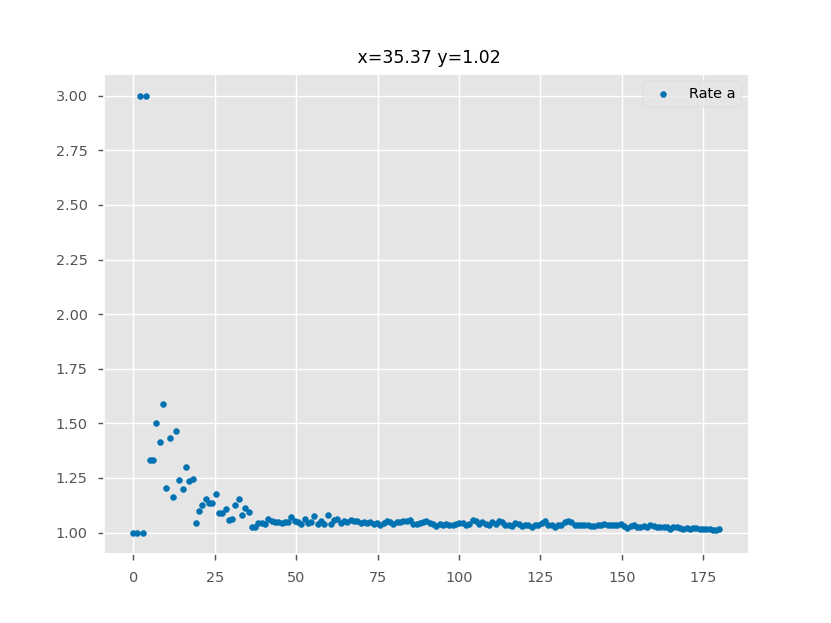

7

In [224]:
plt.figure()
x=np.linspace(0,len(Fecha),len(Fecha)-1)
plt.scatter(x,n_rata,s=11,label='Rate a')
plt.legend()

def onclick(event):
    plt.cla()
    plt.scatter(x,n_rata,s=11,label='Rate a')
    plt.gca().set_title(' x={:.2f} y={:.2f}'.format( event.xdata, event.ydata))
    plt.legend()
    
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

Based on the last plot: The rate stabilized at around the 36 value.

In [297]:
rata = n_rata[36:]
a=np.average(rata)
a

1.0388469052205493

So: 

$$ a = \frac{I(t+1)}{I(t)} \approx 1.0388469052205493$$

And, we can get now the initial pandemic data for Colombia:  **date = 2020-04-11**  which correspound to

$$ t_i = 36 $$

In [298]:
t_i=36
Col = df2.loc[t_i:,df2.columns]

Col.head()

,Fecha,dias,Casos
36,2020-04-11,37.0,2709.0
37,2020-04-12,38.0,2776.0
38,2020-04-13,39.0,2852.0
39,2020-04-14,40.0,2979.0
40,2020-04-15,41.0,3105.0


In [299]:
Date_i, day_i,I0 = Col.loc[t_i,Col.columns[0]], Col.loc[t_i,Col.columns[1]], Col.loc[t_i,Col.columns[2]]
print(r'initial date={}, day={}, and I_0={}'.format(Date_i, day_i,I0))

initial date=2020-04-11 00:00:00, day=37.0, and I_0=2709.0


### Datos de la Simulacion:

Valores Iniciales: 

$$r=0$$

$$s=1-i$$

$$i=I/N$$

Como la RATA es estable desde el inicio. Se usa el valor de  $I(0)=I=25.0189$.

In [300]:
# Valores
N=45000000
I=I0
r=0
i=I/N
s=1-i

print(r'Datos iniciales: i={:.5f} y s={:.5f}'.format(i,s))
print(r'rata={}'.format(a))

Datos iniciales: i=0.00006 y s=0.99994
rata=1.0388469052205493


## SIR Colombia
___

In [284]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<IPython.core.display.Javascript object>


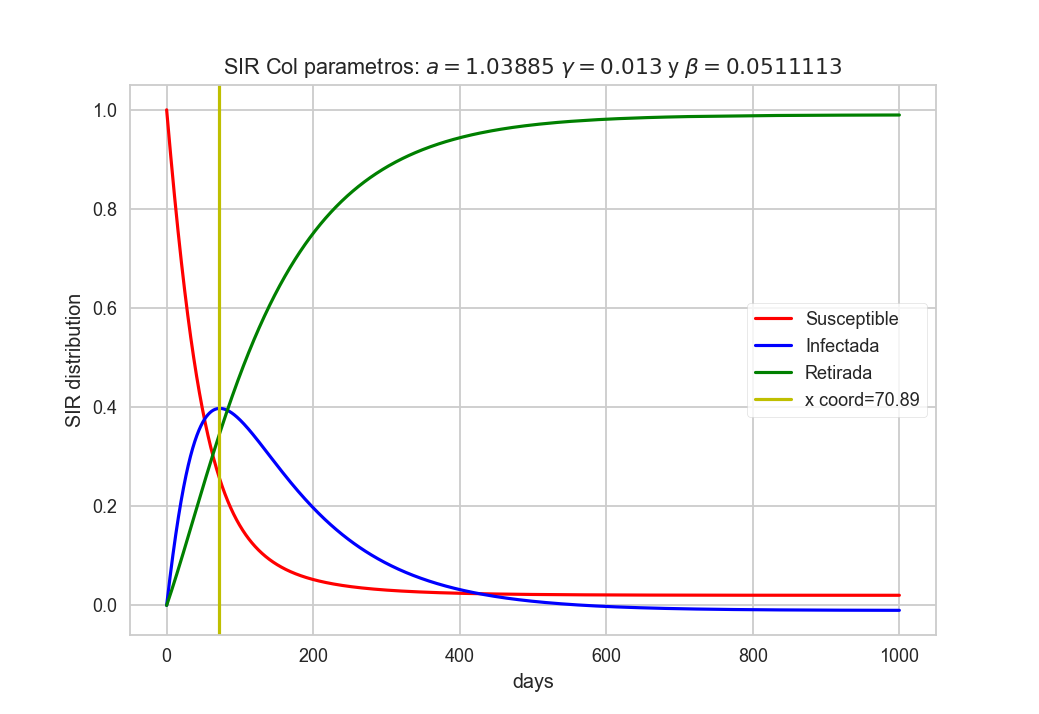

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('seaborn-notebook')

datos = pd.read_csv('SIRColombia.csv')

parametros = datos.columns
datos.columns = [''] * len(datos.columns)

datos.columns=['time', 'S', 'I', 'R']


plt.figure()
plt.plot(datos['time'],datos['S'],c='r',label='Susceptible')
plt.plot(datos['time'],datos['I'],c='b',label='Infectada')
plt.plot(datos['time'],datos['R'],c='g',label='Retirada')
plt.xlabel('days')
plt.ylabel('SIR distribution')
plt.title(r'SIR Col parametros: $a={}$ $\gamma={}$ y $\beta={}$'.format(parametros[1],parametros[2],parametros[3]),
         size=12)
plt.legend(frameon=True)


def onclick(event):
    plt.cla()
    plt.plot(datos['time'],datos['S'],c='r',label='Susceptible')
    plt.plot(datos['time'],datos['I'],c='b',label='Infectada')
    plt.plot(datos['time'],datos['R'],c='g',label='Retirada')
    plt.axvline(x=event.xdata, color='y',label='x coord={:.2f}'.format(event.xdata))
    plt.xlabel('days')
    plt.ylabel('SIR distribution')
    plt.gca().set_title(r'SIR Col parametros: $a={}$ $\gamma={}$ y $\beta={}$'.format(parametros[1],parametros[2],parametros[3]),
         size=12)
    plt.legend(frameon=True)
    
kg = plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [26]:
plt.savefig('SIR_gamma{}beta{}.jpg'.format(parametros[2],parametros[3]))